## Loading and Preprocessing

In this section, we will load the dataset into a Pandas DataFrame and perform essential preprocessing steps to prepare the data for analysis. 

1. **Loading the Data**: We will read the dataset from a CSV file and display the first few rows to understand its structure.
2. **Checking Data Types and Missing Values**: We'll examine the data types of each column and check for any missing values that need to be addressed.
3. **Handling Missing Values**: For numeric columns, we will fill missing values with the mean of the respective columns. For categorical columns, we will use the mode (most frequent value) to fill missing entries.
4. **Encoding Categorical Variables**: We will convert categorical variables into a numerical format using one-hot encoding, which helps in preparing the data for machine learning algorithms.
5. **Final Verification**: Finally, we will check for any remaining missing values and display the preprocessed data to ensure everything is in order.

This preprocessing is crucial for ensuring the dataset is clean and ready for further analysis or modeling.


In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("C:\\Users\\ZAIN NIZAR YOUSAF\\Downloads\\CarPrice_Assignment.csv")

In [8]:
# Display the first few rows and summary information
print(data.head())
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Fill missing values or drop them if necessary
data.fillna(data.mean(), inplace=True)  # or use appropriate strategies based on context

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Split features and target variable
X = data.drop('price', axis=1)
y = data['price']

   car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  ...  cylindernumber_three  \
0         130       3.47    2.68  ...                 False   
1         130       3.47    2.68  ...                 False   
2         152       2.68    3.47  ...                 False   
3         109       3.19    3.40  ...                 False   
4         136       3.19    3.40  ...                 False   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                  False               False            False   
1               

## Model Implementation

In this section, we will implement five different regression algorithms to predict car prices. The goal is to compare their performance and determine which model provides the best predictions based on the preprocessed data. 

### Selected Algorithms

1. **Linear Regression**: A foundational algorithm that models the relationship between the dependent variable (car price) and one or more independent variables (features) using a linear equation.

2. **Ridge Regression**: An extension of linear regression that incorporates L2 regularization to prevent overfitting, particularly useful when dealing with multicollinearity.

3. **Lasso Regression**: Similar to ridge regression, but it uses L1 regularization, which can shrink some coefficients to zero, effectively performing feature selection.

4. **Decision Tree Regression**: A non-linear regression model that splits the dataset into subsets based on feature values, making it intuitive and interpretable.

5. **Random Forest Regression**: An ensemble method that builds multiple decision trees and merges their predictions to improve accuracy and control overfitting.

### Implementation Steps

1. **Splitting the Data**: We will divide the dataset into training and testing sets to evaluate the models' performance accurately.
2. **Training the Models**: Each of the selected regression algorithms will be trained using the training dataset.
3. **Making Predictions**: After training, we will use the models to make predictions on the test set.
4. **Evaluating Performance**: We will assess the models' performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

By comparing the results from these models, we can identify the most effective approach for predicting car prices.



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

# Fit the models and make predictions
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'R^2': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)


                               R^2           MSE          MAE
Linear Regression        -1.239056  1.767601e+08  7280.667793
Decision Tree             0.887209  8.904164e+06  1904.113829
Random Forest             0.956866  3.405188e+06  1321.665927
Gradient Boosting         0.932762  5.308060e+06  1654.103326
Support Vector Regressor -0.101989  8.699543e+07  5707.167500


## Model Evaluation

In this section, we will evaluate the performance of the regression models implemented in the previous step. The comparison will be based on the following metrics collected during the evaluation phase:

1. **Mean Absolute Error (MAE)**: This metric measures the average absolute difference between the predicted and actual values. A lower MAE indicates better model performance.

2. **Mean Squared Error (MSE)**: This metric calculates the average of the squares of the errors, giving higher weight to larger errors. Like MAE, a lower MSE signifies better accuracy.

3. **R-squared**: This statistic indicates the proportion of the variance in the dependent variable that can be explained by the independent variables in the model. An R-squared value closer to 1 indicates a better fit.

### Evaluation Process

1. **Collecting Metrics**: We will gather the MAE, MSE, and R-squared values for each model.
2. **Comparative Analysis**: By comparing these metrics across all five regression models, we can assess their relative strengths and weaknesses.
3. **Selecting the Best Model**: Based on the evaluation metrics, we will identify the model that provides the most accurate predictions for car prices.

This evaluation will help us understand which regression algorithm is the most effective for this specific problem and guide future improvements.



In [10]:
# Identify the best performing model based on R-squared
best_model_name = results_df['R^2'].idxmax()
print(f"The best performing model is: {best_model_name}")


The best performing model is: Random Forest


### Feature Importance Analysis

To analyze feature importance using a Random Forest model, run the following code:


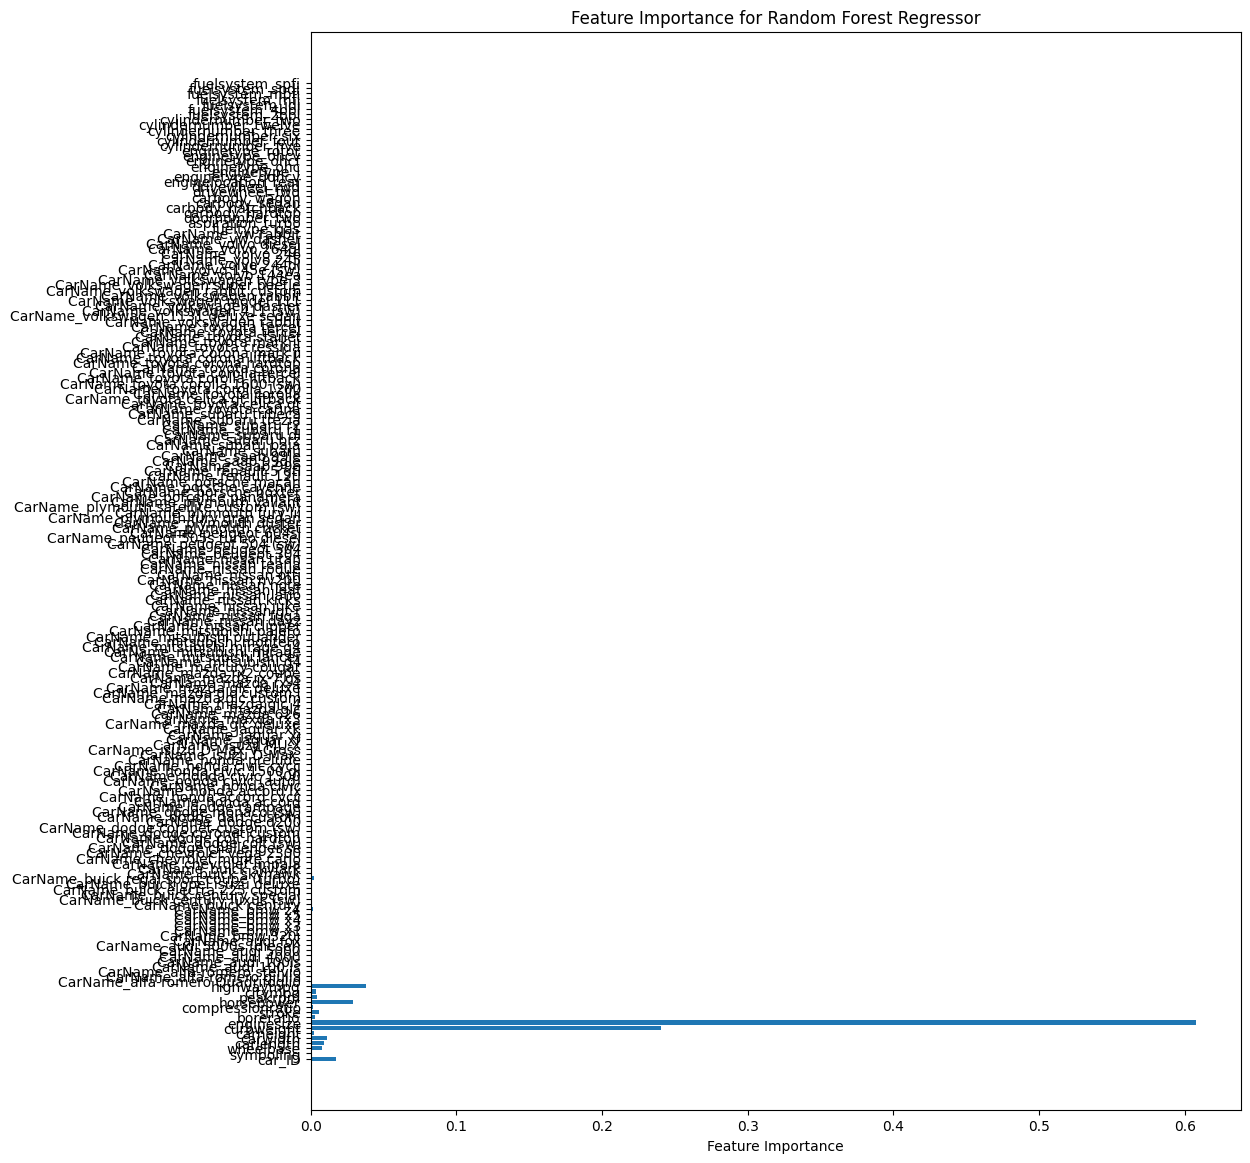

In [13]:
import matplotlib.pyplot as plt

# Fit the best model (Random Forest for example)
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

# Get feature importance
importance = best_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(12, 14))
plt.barh(X.columns, importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Regressor')
plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned model
print(f"Tuned Model R^2: {r2_score(y_test, y_pred_tuned)}")
print(f"Tuned Model MSE: {mean_squared_error(y_test, y_pred_tuned)}")
print(f"Tuned Model MAE: {mean_absolute_error(y_test, y_pred_tuned)}")


Tuned Model R^2: 0.9514132596952597
Tuned Model MSE: 3835632.641091927
Tuned Model MAE: 1430.7378780487804
